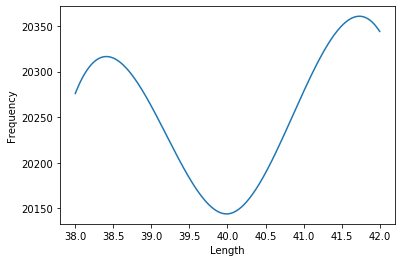

In [71]:
# GETTING SEQUENCE LENGTH DISTRIBUTION FROM A FASTQ FILE

from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Enter the path of input fastq file here
input_fastq_path = r"C:\Users\dell\Desktop\Seq_len_dist\seq_len_dist.fastq"
records = SeqIO.parse(input_fastq_path,"fastq")

len_frequency = {} # stores the frequecy of sequence of a particular length

for record in records:
    if len(record.seq) not in len_frequency.keys():
        len_frequency[len(record.seq)] = 1
    else:
        len_frequency[len(record.seq)] += 1
   

# Sorting dictionary len_frequency on keys
len_frequency = sorted(len_frequency.items())

x = np.array([])  
y = np.array([])

for key,value in len_frequency:
    x = np.append(x,key)
    y = np.append(y,value)
    
# Plotting a smooth graph
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()